<a href="https://colab.research.google.com/github/CallmeQuant/Studying-Notebook/blob/main/Miscellaneous/Pytorch_for_Dummies_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score

## **Problem 1.**
Create a dataset from 10 data points generated from the function $y = x^2 + \text{noise}$. Use sklearn to fit a polynomial function of degree 9 with the data. Then add 100 more data points and see how the polynomial function of degree 9 behaves. Report the MSE and plot the graph in both cases (10 data points initially and 100 data points later). What phenomenon is happening?

In [ ]:
def polynomial_regression(x, y, order):
  poly = PolynomialFeatures(degree=order)
  poly_features = poly.fit_transform(x.reshape(-1, 1))

  poly_reg_model = LinearRegression()
  poly_reg_model.fit(poly_features, y)
  y_predicted = poly_reg_model.predict(poly_features)

  mse = mean_squared_error(y, y_predicted)

  plt.figure(figsize=(10, 6))
  plt.title("Degree: {}".format(order), size=16)
  plt.scatter(x, y, color = "blue")
  plt.scatter(x, y_predicted, color="red")
  plt.show()

  return mse

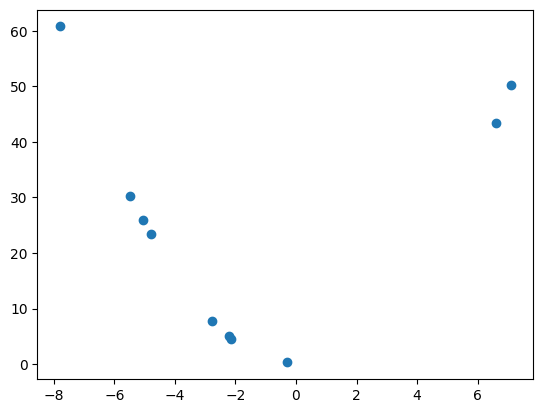

In [ ]:
x = np.random.uniform(-8, 8, 10)
y = [ele**2 + np.random.normal(0, 0.2) for ele in x] # Injecting Gaussian noise

plt.scatter(x, y)

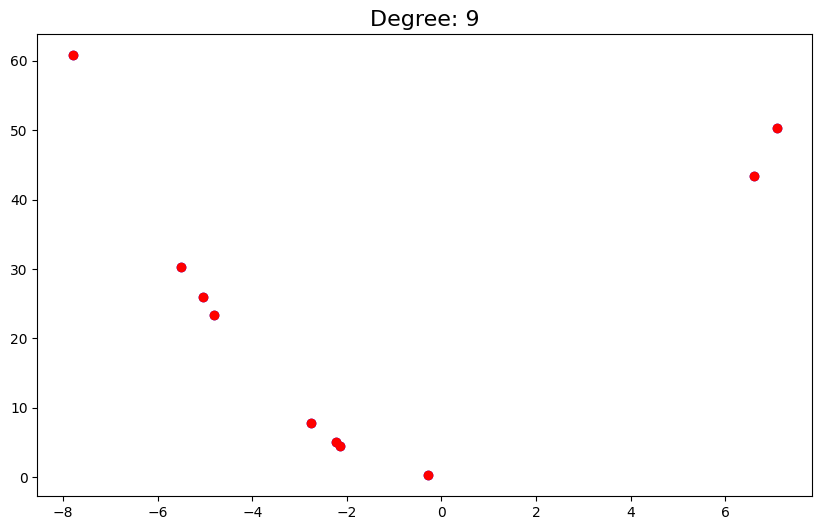

MSE:  5.996763693302693e-14


In [ ]:
print("MSE: ", polynomial_regression(x, y, 9))

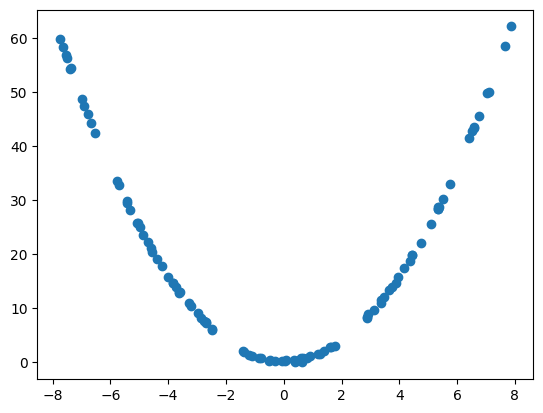

In [ ]:
x = np.random.uniform(-8, 8, 100)
y = [ele**2 + np.random.normal(0, 0.2) for ele in x] # Injecting Gaussian noise

plt.scatter(x, y)

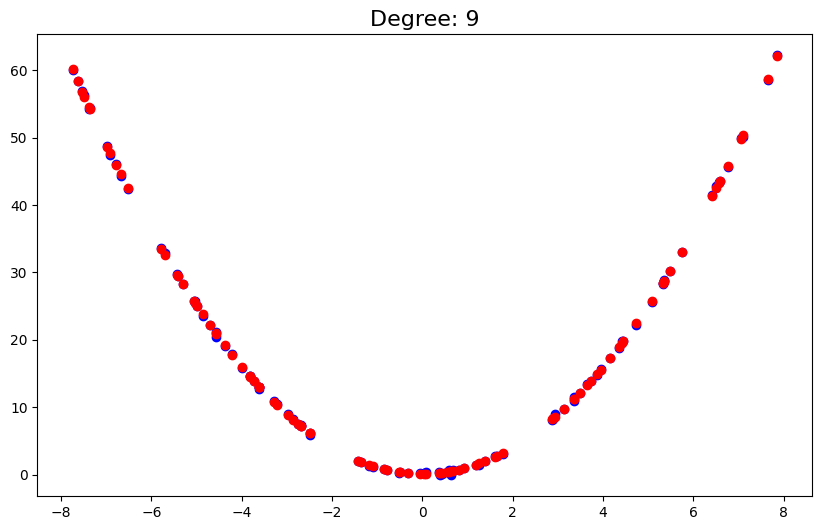

MSE:  0.033289423060484005


In [ ]:
print("MSE: ", polynomial_regression(x, y, 9))

## **Problem 2.**

Code from scratch Implement a function to calculate convolution Input: X, W, stride, padding Output: Y Check again with the convolution function implemented in the Pytorch library

In [ ]:
import torch
import torch.nn.functional as F

def convolution2D(X, W, stride = 1, padding = 0):
  if not isinstance(X, torch.Tensor):
    X = torch.from_numpy(X)
  batch_size, in_channels, in_height, in_width = X.shape # Assume that X is 4-D tensor
  out_channels, _, filter_height, filter_width = W.shape

  # Pad the input
  X_padded = F.pad(X, (padding, padding, padding, padding), mode='constant', value=0)

  # Dimensions of the padded input
  _, _, p_height, p_width = X_padded.shape

  # Output dimension
  out_height = (p_height - filter_height) // stride + 1
  out_width = (p_width - filter_width) // stride + 1

  # Placeholder for output
  Y = torch.zeros((batch_size, out_channels, out_height, out_width))

  # Perform the convolution operation
  for b in range(batch_size):
    for c in range(out_channels):
      for i in range(0, p_height - filter_height + 1, stride):
        for j in range(0, p_width - filter_width + 1, stride):
          Y[b, c, i//stride, j//stride] = torch.sum(X_padded[b, :, i: i+filter_height,
                                                                      j: j+filter_width] * W[c])

  return Y


In [ ]:
X = torch.randn(1, 1, 9, 9)  # Batch size 1, 1 channel, 9x9 input
W = torch.randn(1, 1, 5, 5)  # 1 filter, 1 channel, 5x5 kernel
stride = 1
padding = 0

print("X:", X)
print("W:", W)

custom_result = convolution2D(X, W, stride, padding)
torch_result = F.conv2d(X, W, stride=stride, padding=padding)

# Checking results are close or not
print("Custom Convolution Result:")
print(custom_result)

print("\nPyTorch Convolution Result:")
print(torch_result)

# Kiểm tra sự tương đồng giữa hai kết quả
print("\nCheck similarity:")
print(torch.allclose(custom_result, torch_result))

X: tensor([[[[-6.2619e-01, -1.1672e+00, -1.0655e-01,  5.6602e-01,  4.1645e-01,
            3.1618e-01,  1.1350e+00,  1.6789e+00, -5.2651e-01],
          [-2.5820e-01,  9.6159e-01, -5.9308e-01,  4.3781e-01, -3.7793e-02,
           -1.6261e+00, -6.1002e-01,  6.5846e-01,  1.1590e+00],
          [ 4.3915e-01, -6.6444e-02, -5.1293e-01,  1.9807e+00,  1.4168e+00,
           -5.2612e-02, -1.5055e+00,  1.0545e+00,  1.5125e+00],
          [-6.5675e-02,  2.9763e-01, -1.2476e+00,  6.1361e-01,  6.9608e-01,
            2.5248e+00, -6.4494e-01,  1.8769e+00,  1.1639e+00],
          [-1.2616e+00,  8.7421e-01, -1.3773e+00,  1.9979e-01,  2.2467e-01,
           -8.1947e-01, -4.6147e-01, -8.6011e-01,  1.6447e+00],
          [ 5.2869e-01,  1.6168e+00,  3.5770e-01, -2.7379e-01,  9.4526e-01,
           -4.3377e-01, -5.2309e-01,  1.8018e-01,  1.6179e+00],
          [-1.6358e+00,  8.0902e-01,  6.7664e-01, -6.8073e-01, -1.5199e+00,
            6.7466e-04,  1.1435e+00,  3.8242e-01,  5.3812e-01],
          [-4.854

## **Problem 3.**
For the CIFAR-10 dataset, implement a model similar to VGG16 (can be shallower) using Pytorch. Adjust the learning rate and plot the corresponding loss graph. Split the train/test set at a ratio of 80/20, calculate the accuracy, recall, and f1-score on the test set.

### **Dataset Loader**

In [2]:
def data_loader(batch_size, seed = 42, valid_size = 0.2, test = False, shuffle = True):
  # define transforms
  transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomCrop(32, padding=4),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  if test:
    dataset = torchvision.datasets.CIFAR10(
          root='./data', train=False,
          download=True, transform=transform,
        )

    test_loader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle
        )
    print('Creating test loader successfully')
    return test_loader

  train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  num_train = len(train_dataset)
  indices = list(range(num_train))
  if shuffle:
    torch.manual_seed(seed)
    indices = torch.randperm(len(train_dataset))
  else:
    indices = torch.arange(len(train_dataset))

  train_indices, val_indices = train_test_split(indices.numpy(), test_size=valid_size, random_state=seed)
  train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
  val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
  val_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=val_sampler)
  print('Creating train and validation loader successfully')

  return (train_loader, val_loader)

In [3]:
# Set up the configuration
batch_size = 64
train_loader, val_loader = data_loader(batch_size=batch_size)
test_loader = data_loader(batch_size=batch_size,  test=True)

Files already downloaded and verified
Creating train and validation loader successfully
Files already downloaded and verified
Creating test loader successfully


In [9]:
for i, (data, label) in enumerate(train_loader):
  print(data.shape)
  print(label.shape)
  break

torch.Size([64, 3, 32, 32])
torch.Size([64])


### **Model Architecture**

In [24]:
class VGG(nn.Module):
  def __init__(self, conv_layers, num_classes = 10, simple = True, init_weights = True):
    super(VGG, self).__init__()
    # Fully connnected layers
    self.conv_layers = conv_layers
    if simple:
      self.classifier = nn.Sequential(
          nn.ReLU(True),
          nn.Linear(64 * 8 * 8, 128),
          nn.ReLU(True),
          nn.Linear(128, num_classes),
        )
    else:
      self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )

    if init_weights:
      self._initialize_weights()

  def forward(self, x):
    x = self.conv_layers(x)
    x = x.view(-1, 64 * 8 * 8)
    out = self.classifier(x)
    return out

  def _initialize_weights(self):
    for m in self.modules():
      if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight,
                                mode='fan_out',
                                nonlinearity='relu')
        if m.bias is not None:
          nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.BatchNorm2d):
        nn.init.constant_(m.weight, 1)
        nn.init.constant_(m.bias, 0)
      elif isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, 0, 0.01)
        nn.init.constant_(m.bias, 0)


def stacked_layers(config, batch_norm = True, verbose = False):
  layers = []
  in_channels = 3
  for i, conf in enumerate(config):
    if conf == 'M':
      layers += [nn.MaxPool2d(kernel_size = 2, stride = 2)]
      if verbose:
        print(f'Pass at layer {i+1} with MaxPooling2d')
    else:
      conv2d = nn.Conv2d(in_channels, conf, kernel_size=3, padding=1)
      if verbose:
        print(f'Pass at layer {i+1} with in_channels and out_channels: {(in_channels, conf)}')
      if batch_norm:
        layers += [conv2d, nn.BatchNorm2d(conf), nn.ReLU(inplace = True)]
      else:
        layers += [conv2d, nn.ReLU(inplace=True)]
      # Update in_channels
      in_channels = conf
  return nn.Sequential(*layers)

config = {'vgg16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,'M', 512, 512, 512, 'M'],
          'vgg11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
          'simplevgg': [32, 'M', 64, 'M']}
def VGG16(simple_architecture = True, **kwargs):
  if simple_architecture:
    kwargs['simple'] = True

  model = VGG(stacked_layers(config['simplevgg'], batch_norm=True), **kwargs)
  return model

### **Ultis Function for Training**

In [12]:
import time
def adjust_learning_rate(optimizer, epoch, lr):
  """Sets the learning rate to the initial LR decayed by 0.1 every 10 epochs"""
  lr  = lr * (0.01 ** (epoch // 10))
  for param_group in optimizer.param_groups:
    param_group['lr'] = lr

def fix_seed(seed):
  # Set seed
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)

class Timer:
  """Record multiple running times."""
  def __init__(self):
    """Defined in :numref:`sec_minibatch_sgd`"""
    self.times = []
    self.start()

  def start(self):
    """Start the timer."""
    self.tik = time.time()

  def stop(self):
    """Stop the timer and record the time in a list."""
    self.times.append(time.time() - self.tik)
    return self.times[-1]

  def avg(self):
    """Return the average time."""
    return sum(self.times) / len(self.times)

  def sum(self):
    """Return the sum of time."""
    return sum(self.times)

  def cumsum(self):
    """Return the accumulated time."""
    return np.array(self.times).cumsum().tolist()

### **Hyperparameters and Initialize Model**

In [25]:
# Set up hyperparameters
learning_rate = 0.01
momentum = 0.9
weight_decay = 1e-4
num_epochs = 20
seed = 42

# Check if cuda is available
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

# Define model
model = VGG16()

# define loss function (criterion) and optimizer
criterion = nn.CrossEntropyLoss()

if use_cuda:
  model = model.cuda()
  criterion = criterion.cuda()

optimizer = torch.optim.SGD(model.parameters(), learning_rate,
                            momentum=momentum,
                            weight_decay=weight_decay)

In [26]:
print(model)

VGG(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): ReLU(inplace=True)
    (1): Linear(in_features=4096, out_features=128, bias=True)
    (2): ReLU(inplace=True)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [27]:
torch.cuda.empty_cache()

### **Training**

In [28]:
from tqdm import tqdm
import torch.optim.lr_scheduler
# Placeholder for train and validation loss/accuracy
train_losses = []
val_losses = []

train_acc = []
val_acc = []

fix_seed(seed)
# Set timer to record the computational time
timer = Timer()

# Create a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max',
                                                       factor=0.1, patience=5)
for epoch in tqdm(range(1, num_epochs + 1)):
  # Start the timer
  timer.start()

  model.train()
  total_train_samples = 0.0
  # Initialize loss/acc per sample
  sample_loss = 0.
  sample_acc = 0.

  # adjust_learning_rate(optimizer, epoch, learning_rate)
  for i, (train_data, train_label) in enumerate(train_loader):
    # Extracting constants for loss computation
    batch_size = train_label.size(0)
    total_train_samples += batch_size
    # Move tensors to the configured device
    train_data = train_data.to(device)
    train_label = train_label.to(device)

    # Forward pass
    output = model(train_data)
    # Compute loss
    loss = criterion(output, train_label)
    # clear gradient
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with
    # respect to all the learnable parameters
    loss.backward()
    optimizer.step()
    # Compute acc
    acc = (output.argmax(dim=1) == train_label).sum().item()
    sample_acc += acc

    sample_loss += loss.item()
  loss_at_epoch = sample_loss / len(train_loader)
  acc_at_epoch = sample_acc / total_train_samples

  train_losses.append(loss_at_epoch)
  train_acc.append(acc_at_epoch)

  # Evaluation stage
  model.eval()
  val_sample_loss = 0.0
  val_sample_acc = 0.0
  total_val_samples = 0.0
  with torch.no_grad():
    for val_data, val_label in val_loader:
      batch_size = val_label.size(0)
      total_val_samples += batch_size
      val_label = val_label.to(device)
      val_data = val_data.to(device)

      output = model(val_data)
      # Compute loss
      loss = criterion(output, val_label)
      # Compute acc
      acc = (output.argmax(dim=1) == val_label).sum().item()
      val_sample_acc += acc
      val_sample_loss += loss.item()

    loss_val_at_epoch = val_sample_loss / len(val_loader)
    val_losses.append(loss_val_at_epoch)
    acc_val_at_epoch = val_sample_acc / total_val_samples
    val_acc.append(acc_val_at_epoch)
  # Stop the timer at the end of the epoch
  timer.stop()
  # Update the learning rate based on validation accuracy
  scheduler.step(acc_val_at_epoch)
  if (int(epoch) % 2) == 0:
      print(
      f'Epoch: [{epoch}/{num_epochs}]'
      + f' | Train loss: {loss_at_epoch:.3f}'
      + f' | Train acc: {acc_at_epoch:.3f}'
      + f' | Val loss: {loss_val_at_epoch:.3f}'
      + f' | Val acc: {acc_val_at_epoch:.3f}'
      + f' | Time per epoch: {timer.times[-1]:.2f} seconds')

total_time_all_epoch = timer.sum()
print(f"Total training time: {total_time_all_epoch/60:.2f} minutes")

 10%|█         | 2/20 [00:46<07:02, 23.48s/it]

Epoch: [2/20] | Train loss: 1.309 | Train acc: 0.525 | Val loss: 1.235 | Val acc: 0.558 | Time per epoch: 23.63 seconds


 20%|██        | 4/20 [01:32<06:06, 22.93s/it]

Epoch: [4/20] | Train loss: 1.045 | Train acc: 0.626 | Val loss: 1.009 | Val acc: 0.635 | Time per epoch: 22.65 seconds


 30%|███       | 6/20 [02:18<05:22, 23.07s/it]

Epoch: [6/20] | Train loss: 0.917 | Train acc: 0.676 | Val loss: 0.948 | Val acc: 0.668 | Time per epoch: 22.80 seconds


 40%|████      | 8/20 [03:03<04:32, 22.73s/it]

Epoch: [8/20] | Train loss: 0.846 | Train acc: 0.702 | Val loss: 0.889 | Val acc: 0.688 | Time per epoch: 22.03 seconds


 50%|█████     | 10/20 [03:49<03:47, 22.73s/it]

Epoch: [10/20] | Train loss: 0.788 | Train acc: 0.722 | Val loss: 0.903 | Val acc: 0.686 | Time per epoch: 22.52 seconds


 60%|██████    | 12/20 [04:34<03:01, 22.70s/it]

Epoch: [12/20] | Train loss: 0.746 | Train acc: 0.739 | Val loss: 0.781 | Val acc: 0.727 | Time per epoch: 22.45 seconds


 70%|███████   | 14/20 [05:19<02:15, 22.61s/it]

Epoch: [14/20] | Train loss: 0.716 | Train acc: 0.749 | Val loss: 0.758 | Val acc: 0.737 | Time per epoch: 22.68 seconds


 80%|████████  | 16/20 [06:04<01:29, 22.42s/it]

Epoch: [16/20] | Train loss: 0.684 | Train acc: 0.760 | Val loss: 0.760 | Val acc: 0.737 | Time per epoch: 22.28 seconds


 90%|█████████ | 18/20 [06:49<00:45, 22.51s/it]

Epoch: [18/20] | Train loss: 0.660 | Train acc: 0.768 | Val loss: 0.728 | Val acc: 0.748 | Time per epoch: 22.57 seconds


100%|██████████| 20/20 [07:34<00:00, 22.74s/it]

Epoch: [20/20] | Train loss: 0.643 | Train acc: 0.776 | Val loss: 0.708 | Val acc: 0.756 | Time per epoch: 22.90 seconds
Total training time: 7.58 minutes


### **Loss and Accuracy Training Plot**

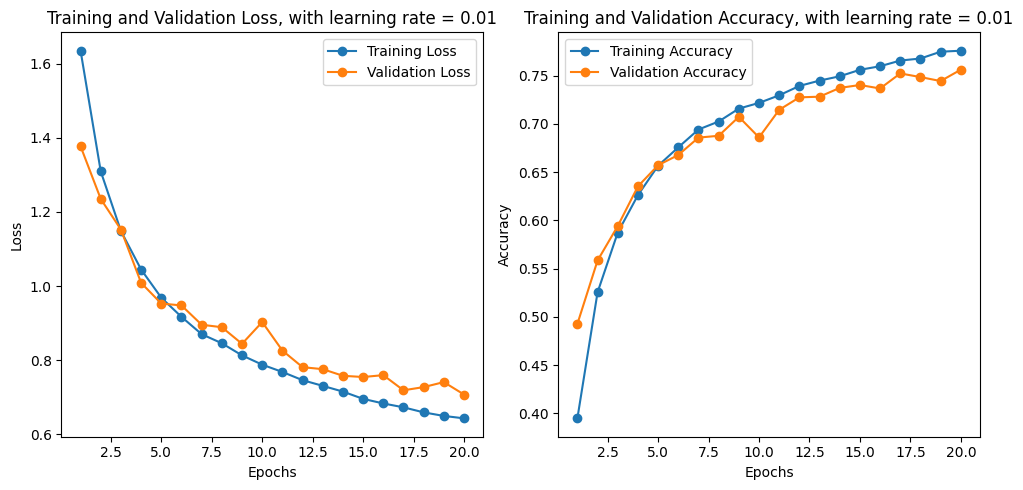

In [29]:
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
ax1.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss, with learning rate = {}'.format(learning_rate))
ax1.legend()

ax2.plot(range(1, num_epochs + 1), train_acc, label='Training Accuracy', marker='o')
ax2.plot(range(1, num_epochs + 1), val_acc, label='Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy, with learning rate = {}'.format(learning_rate))
ax2.legend()
plt.tight_layout()
plt.show()

In [31]:
# Test set
model.eval()
test_loss = 0.0
test_acc = 0.0
predictions = []
targets = []

for test_data, test_label in tqdm(test_loader):
  test_data = test_data.to(device)
  test_label = test_label.to(device)
  output = model(test_data)
  loss = criterion(output, test_label)
  test_loss += loss.item()
  acc = (output.argmax(dim=1) == test_label).sum().item()
  test_acc += acc
  _, predicted = torch.max(output, 1)
  predictions.extend(predicted.detach().cpu().numpy())
  targets.extend(test_label.detach().cpu().numpy())

accuracy = accuracy_score(targets, predictions)
recall = recall_score(targets, predictions, average='macro')
f1 = f1_score(targets, predictions, average='macro')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1 Score: {f1:.4f}')

100%|██████████| 157/157 [00:05<00:00, 27.22it/s]

Test Accuracy: 0.7619
Test Recall: 0.7619
Test F1 Score: 0.7593
